# Discussion 2: Sampling, Random Walk

## 0. Important Dates

## 1. [Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method) for estimating $\pi$

* Monte Carlo methods vary, but tend to follow a particular pattern:     
    * Define a domain of possible inputs
    * Generate inputs randomly from a probability distribution over the domain
    * Perform a deterministic computation on the inputs
    * Aggregate the results
* A method of random sampling process to simulate some unknown complicated object, e.g, $\pi$.
* Monte Carlo Tutorial from [Kaggle](https://www.kaggle.com/nickgould/monte-carlo-tutorial-calculating-pi).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
    
from numpy.random import random
from numpy import pi

import os

### Some complicated one

In [12]:
def MonteCarloPi(maxIterations):
#Draw a square and a circle to frame out simulation
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    circleX,circleY = [],[]
    
    for i in range(361):
        circleX.append(np.cos(np.pi*i/180))
        circleY.append(np.sin(np.pi*i/180))

#Start keeping track of values we're interested in
    insideX,insideY,outsideX,outsideY,Iteration,CurrentPi = [],[],[],[],[],[]
    insideCounter = 0

#Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on an xy plane
    for i in range(maxIterations):
        x = 2*(random()-0.5)
        y = 2*(random()-0.5)
        r = np.sqrt(x**2+y**2)
        Iteration.append(i)
        if r <= 1:
            insideCounter +=1
            insideX.append(x)
            insideY.append(y)
        else:
            outsideX.append(x)
            outsideY.append(y)
        CurrentPi.append(4*insideCounter/(i+1))

    piValue = 4*insideCounter / maxIterations
    piError = round(100*((piValue-pi)/pi),4)

#Draw a 2D plot of where our iterations landed compared to the square and circle
    rcParams['figure.figsize'] = 5, 5   #to define the size of a graph
    plt.plot(squareX,squareY,color='#000000')
    plt.plot(circleX,circleY,color='#0000CC')
    plt.scatter(insideX,insideY,color='#00CC00',marker=".")
    plt.scatter(outsideX,outsideY,color='#CC0000',marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
#Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.plot(Iteration,CurrentPi,color='#009900')
    plt.axhline(y=pi,color='#0F0F0F',ls='--')
    plt.axis([0,maxIterations,0,4.1])
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.show()

#print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')

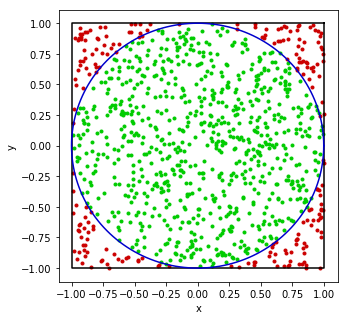

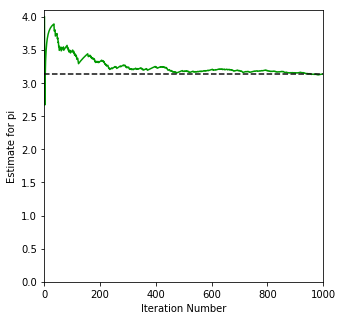


Pi is approximately 3.136

This is -0.178% off the true value.



In [15]:
MonteCarloPi(1000)

## 2. [Random Walk](https://en.wikipedia.org/wiki/Random_walk)

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

See here: [picture](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/rand_2D.gif)      
Also, the following code has its reference from [this website](https://www.geeksforgeeks.org/random-walk-implementation-python/)(Just for the use of discussion, not intended for any commercial use).    

### 1-D random walk: generating some random integers.

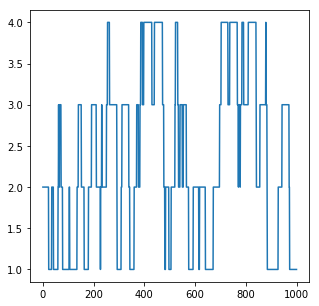

In [6]:
# Python code for 1-D random walk. 
import random 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Probability to move up or down 
prob = [0.05, 0.95]   
  
# statically defining the starting position 
start = 2  
positions = [start] #start from 2
  
# creating the random points for 1000 times
rr = np.random.random(1000) #default: random number between 0 and 1.

downp = (rr < prob[0]) #if the number is less than 0.05, then go down for 1. 
upp = rr > prob[1] #if the number is greater than 0.95, move up for 1.
  
    
for idown, iup in zip(downp, upp):
    #what does the zip do? Try Google it youself.
    down = ((idown) and (positions[-1] > 1)) #if the current position is greater than 1 and idown is 1, go down for 1.
    up = ((iup) and (positions[-1] < 4)) #if the current position is less than 4 and iup is 1, go up for 1.
    positions.append(positions[-1] - down + up) #down and up could be 0, don't move.
    
#plot
plt.plot(positions) 
plt.show() 

### 2-D random walk: generating coordinates

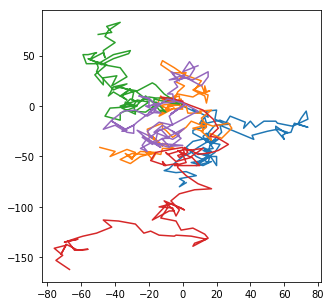

In [7]:
#STORING AND PLOTTING PATHS

N=100
MIN = -10
MAX = 10
N_PATHS = 5

def make_path(N,low,high, start=0):
    path = [start]
    for i in range(N-1):
        path.append(path[i] + np.random.randint(low,high))
    return path


for i in range(N_PATHS):

    x_coords = make_path(N,MIN,MAX) #generate random coordinates
    y_coords = make_path(N,MIN,MAX)

    plt.plot(x_coords,y_coords)



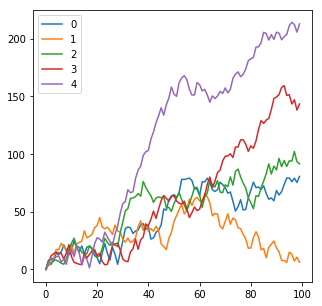

In [8]:
# get distance for every step and store it in a list

#calculate distance
def get_distance(x,y):
    return((x**2 + y**2)**0.5)

#calculate distance for every step
def plot_dists(N,MIN,MAX,N_PATHS):
    for i in range(N_PATHS):
        x_coords = make_path(N,MIN,MAX)
        y_coords = make_path(N,MIN,MAX)
        all_dists = []
        for j in range(len(x_coords)):
            dist_from_origin = get_distance(x_coords[j],y_coords[j])
            all_dists.append(dist_from_origin)


        xs = np.arange(len(x_coords))
        plt.plot(xs,all_dists,label = i)

###
    
    
N=100
MIN = -10
MAX = 10
N_PATHS = 5

plot_dists(N,MIN,MAX,N_PATHS)
plt.legend(loc = 'best')
plt.show()

### [3-D random walk](https://pythonmatplotlibtips.blogspot.com/2017/11/simple-way-to-draw-3d-random-walk-matplotlib.html)  (for fun)    
The code belongs to the author, not me.

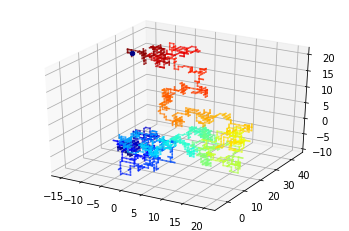

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 2000
R = (np.random.rand(N)*6).astype("int") # random number of 0,1,2,3,4,5

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[ R==0 ] = -1; x[ R==1 ] = 1
y[ R==2 ] = -1; y[ R==3 ] = 1
z[ R==4 ] = -1; z[ R==5 ] = 1
x = np.cumsum(x)
y = np.cumsum(y)
z = np.cumsum(z)

#please ignore this part
plt.figure()
ax = plt.subplot(1,1,1, projection='3d')
cm = plt.get_cmap('jet')
ax.set_prop_cycle('color',[cm(1.*i/(x.shape[-1]-1)) for i in range(x.shape[-1]-1)])
for i in range(x.shape[-1]-1):
    ax.plot([x[i+1],x[i]], [y[i+1],y[i]], [z[i+1],z[i]],alpha=0.6)
ax.scatter(x[-1],y[-1],z[-1],facecolor=cm(1))
plt.savefig('3d_random_walk_static.png', bbox_inches='tight', pad_inches=0.02, dpi=250)
plt.show()

### some useful tricks: np.cumsum ([more examples](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cumsum.html))    
Return the cumulative sum of the elements along a given axis.   
The relationship with getting vectors from coordinates?

In [11]:
x = np.linspace(1,10,10)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [12]:
y = np.cumsum(x)
np.set_printoptions(suppress = True) #avoid the scientific representations of integers, you can ignore this
print(y)

[ 1.  3.  6. 10. 15. 21. 28. 36. 45. 55.]


## 3. scipy.optimize

The scipy.optimize package provides several commonly used optimization algorithms.   
You could understand how to use these packages throughly from reference:    
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

### scipy.optimize.curve_fit()
Use non-linear least squares to fit a function, f, to data.   
Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [15]:
import numpy as np
from scipy.optimize import curve_fit

[1.0338504  1.84657036]


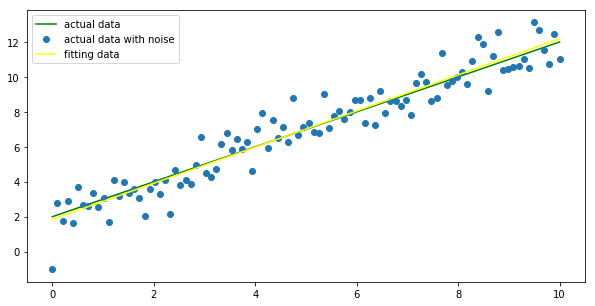

In [16]:
#This is a function to generate linear models
def func(x, a, b):
       return a*x + b

#This is to generate clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

#Add some noise(i.e.randomness) to the data
yn = y + 0.9 * np.random.normal(size=len(x))

#Using curve_fit to fit the noisy data
popt, pcov = curve_fit(func, x, yn)

#popt = Optimal values for the parameters (variable type: array)
#povt = The estimated covariance of popt. (variable type: 2d array)

print(popt)

#some direct explanation
m = np.array([x,np.ones(len(x))])
plt.figure(figsize = (10,5))
plt.plot(x, y, color="green",label = "actual data")
plt.plot(x, yn, "o", label = "actual data with noise")
plt.plot(x, np.dot(m.T,popt), color="yellow", label = "fitting data")
plt.legend(loc = "best")
plt.show()

### [scipy.optimize.fmin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)    
Minimize a function using the downhill simplex algorithm.

In [45]:
import numpy as np
from scipy import optimize

In [43]:
def f(x):
    return (x**2 - 2*x + 1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 32
0.9999999999999991


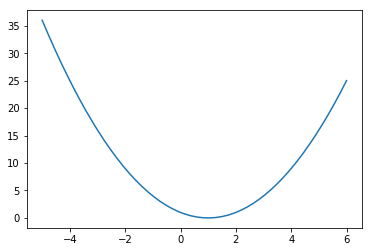

In [54]:
minimum = optimize.fmin(f, 2) #initial guess is 2.
print(minimum[0]) # the minimum value that calculates

x = np.linspace(-5,6,50)
y = []
for i in x:
    y = np.append(y, f(i))

plt.plot(x,y)
plt.show()